## Libraries

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
import matplotlib.image as mpimg

## Carregando imagens e aplicando linear stretching

In [2]:
def linear_stretching(img):
    
    maximum = np.max(img)
    minimum = np.min(img)
    
    return ((img - minimum)/(maximum - minimum)*255).astype(np.int32)

In [56]:
images = np.array(linear_stretching([mpimg.imread(
    'Images/composite_0' + str(i) + '.png') for i in range(1,5)]))

## Plotando imagens

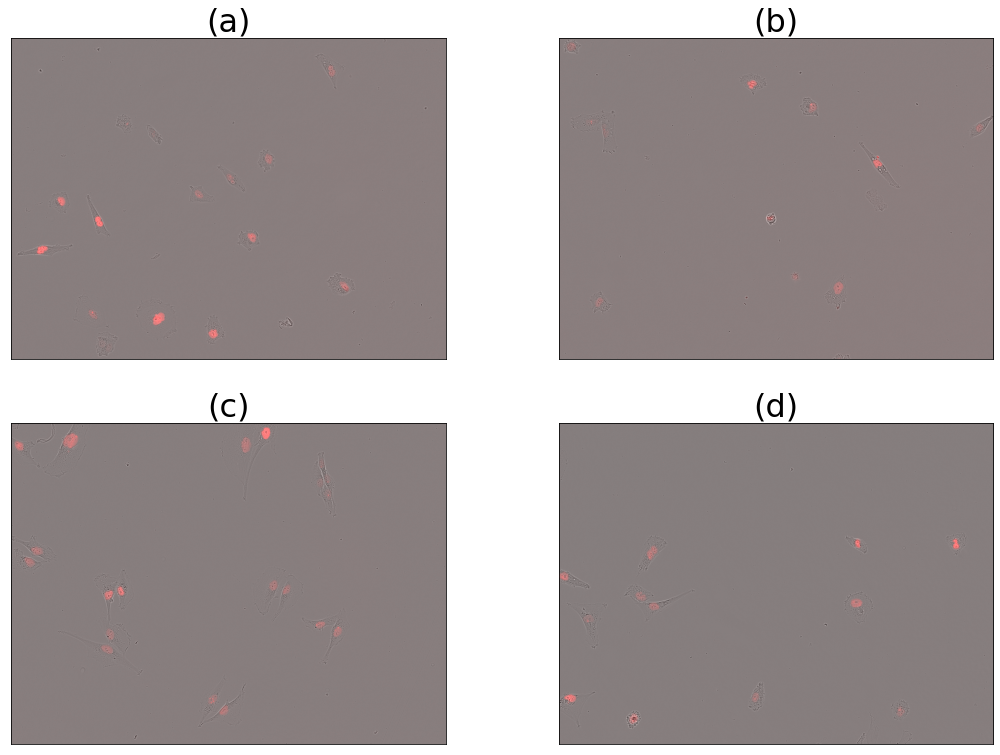

In [64]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images[0])
axs[0][1].imshow(images[1])
axs[1][0].imshow(images[2])
axs[1][1].imshow(images[3])

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Imagens do canal R 

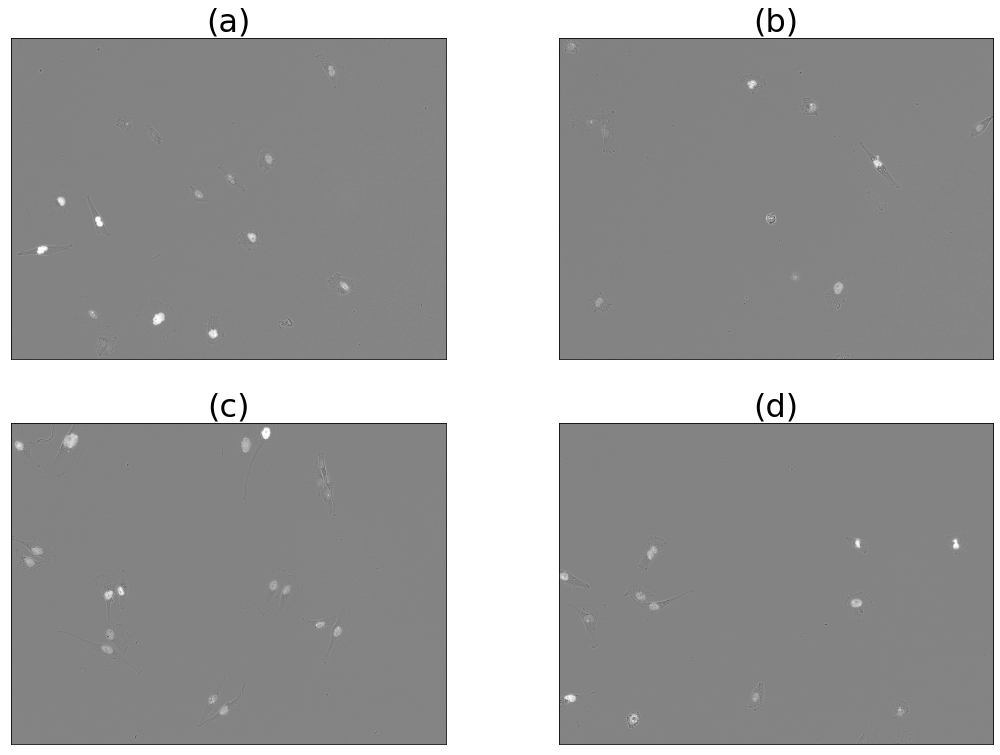

In [66]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images[0][:,:,0], cmap = 'gray')
axs[0][1].imshow(images[1][:,:,0], cmap = 'gray')
axs[1][0].imshow(images[2][:,:,0], cmap = 'gray')
axs[1][1].imshow(images[3][:,:,0], cmap = 'gray')

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Imagens obtidas a partir da diferença absoluta entre os canais R e B 

In [68]:
images_difference = np.array([
    linear_stretching(images[i][:,:,0] - images[i][:,:,2]
                     ) for i in range(4)])

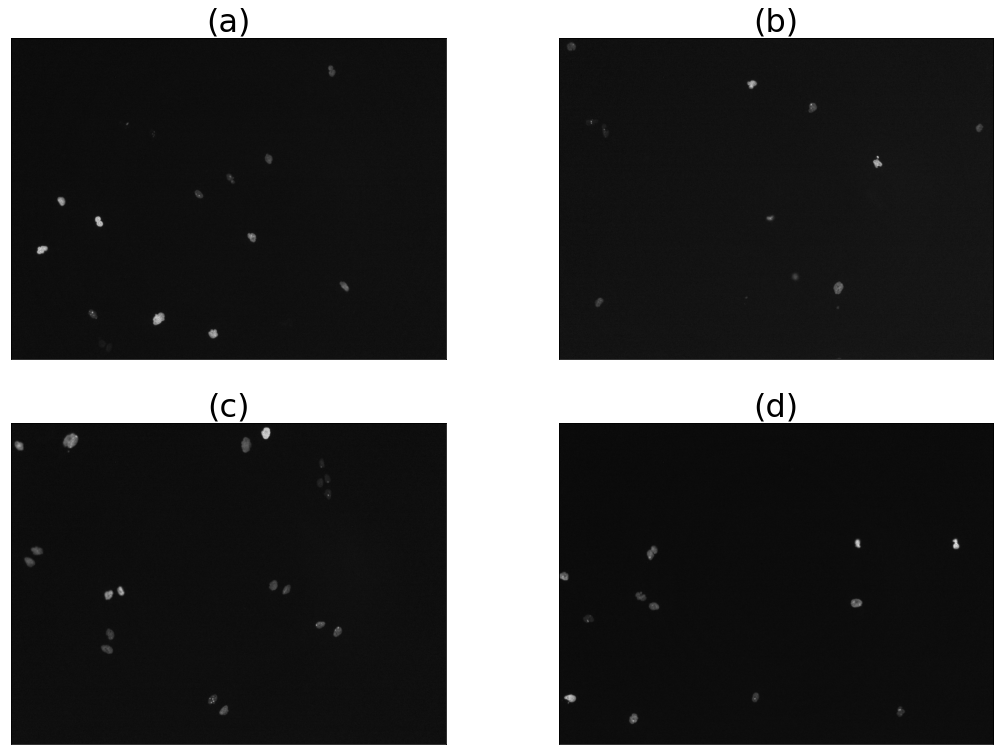

In [70]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images_difference[0], cmap = 'gray')
axs[0][1].imshow(images_difference[1], cmap = 'gray')
axs[1][0].imshow(images_difference[2], cmap = 'gray')
axs[1][1].imshow(images_difference[3], cmap = 'gray')

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

# 2

## Plotando o histograma para cada imagem

In [81]:
from matplotlib.ticker import ScalarFormatter

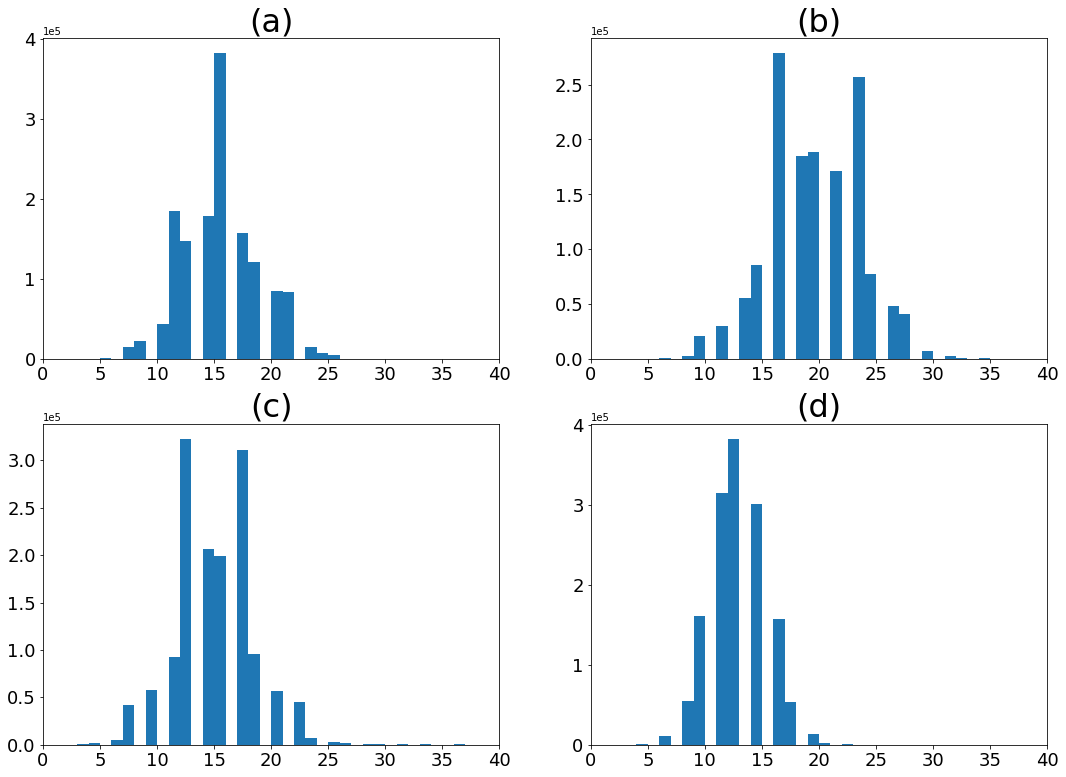

In [104]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].hist(images_difference[0].ravel(), bins = 255)
axs[0][1].hist(images_difference[1].ravel(), bins = 255)
axs[1][0].hist(images_difference[2].ravel(), bins = 255)
axs[1][1].hist(images_difference[3].ravel(), bins = 255)

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Set y label in scientific notation format
        
        ax.set_xlim(0,40)
        ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
        ax.tick_params(axis='both',labelsize=18)

## Thresholding automâtico

In [105]:
def automatic_threshold(img):
    
    intensity = img.ravel()
    
    threshold = np.mean(intensity)
    mu1 = np.mean(intensity[intensity > threshold])
    mu2 = np.mean(intensity[intensity < threshold])
    threshold_old = threshold
    threshold = 1/2*(mu1+mu2)
    count = 0
    
    while(abs(threshold - threshold_old) > 1.0 and count < 100):
        mu1 = np.mean(intensity[intensity > threshold])
        mu2 = np.mean(intensity[intensity < threshold])
        threshold_old = threshold
        threshold = 1/2*(mu1+mu2)
        count += 1
        
    return threshold

In [106]:
thresholds = np.array([automatic_threshold(
    images_difference[i]) for i in range(4)])

In [108]:
print(np.round(thresholds,2))

[16.7  20.04 16.16 13.5 ]


In [115]:
images_bi = []
for i in range(4):
    images_bi.append(images_difference[i] > thresholds[i])
images_bi = np.array(images_bi)

In [116]:
images_bi.shape

(4, 1040, 1408)

## Plotando as imagens binárias

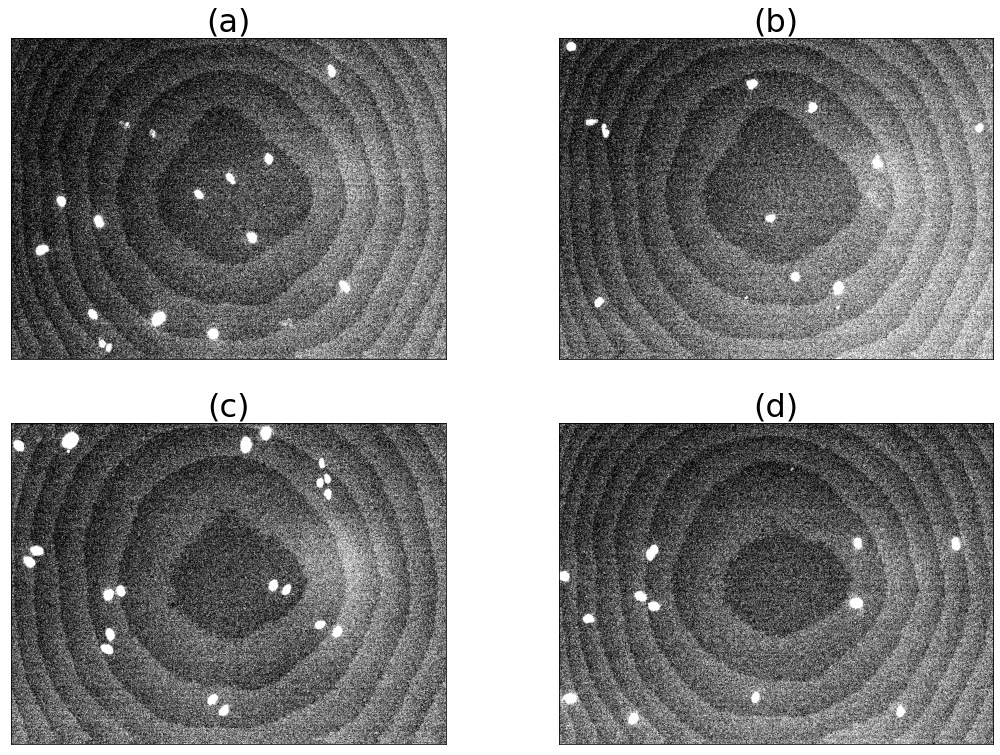

In [117]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images_bi[0], cmap = 'gray')
axs[0][1].imshow(images_bi[1], cmap = 'gray')
axs[1][0].imshow(images_bi[2], cmap = 'gray')
axs[1][1].imshow(images_bi[3], cmap = 'gray')

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Obtendo a imagem binária com método de Otsu

In [17]:
from skimage.filters import threshold_otsu

In [118]:
thresholds_otsu = np.array([threshold_otsu(
    images_difference[i]) for i in range(4)])

In [120]:
print(thresholds_otsu)

[77 57 53 59]


In [119]:
images_bi_otsu = []
for i in range(4):
    images_bi_otsu.append(images_difference[i] > thresholds_otsu[i])
images_bi_otsu = np.array(images_bi_otsu)

## Plotando as imagens binária com método de Otsu

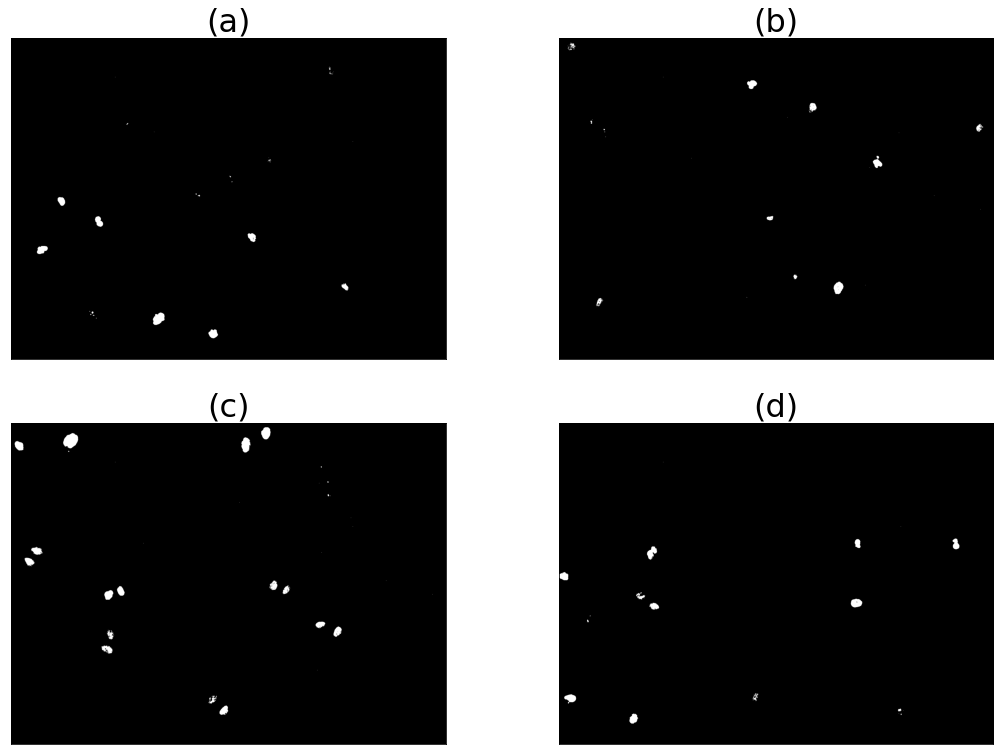

In [121]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images_bi_otsu[0], cmap = 'gray')
axs[0][1].imshow(images_bi_otsu[1], cmap = 'gray')
axs[1][0].imshow(images_bi_otsu[2], cmap = 'gray')
axs[1][1].imshow(images_bi_otsu[3], cmap = 'gray')

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Extraindo as componentes conexas

In [21]:
import cv2

In [136]:
images_contours = []

for i in range(4):
    contours, hierarchy = cv2.findContours(
        np.uint8(images_bi_otsu[i]), 
        cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    images_contours.append(contours)

In [137]:
images_contours_filters = []
images_contours_areas = []

minimum = 100

for i in range(4):
    contours_areas = []
    contours_filters = []
    for j in range(len(images_contours[i])):
        area = cv2.contourArea(images_contours[i][j])
        if area > minimum:
            contours_areas.append(area)
            contours_filters.append(images_contours[i][j])
    images_contours_areas.append(contours_areas)
    images_contours_filters.append(contours_filters)

In [138]:
images_draw = []

for i in range(4):
    images_draw.append(
        cv2.drawContours(
            images[i].copy(), 
            images_contours_filters[i],
            -1,(255,255,0),2))
    
images_draw = np.array(images_draw)

## Plotando a imagem com as componentes destacadas

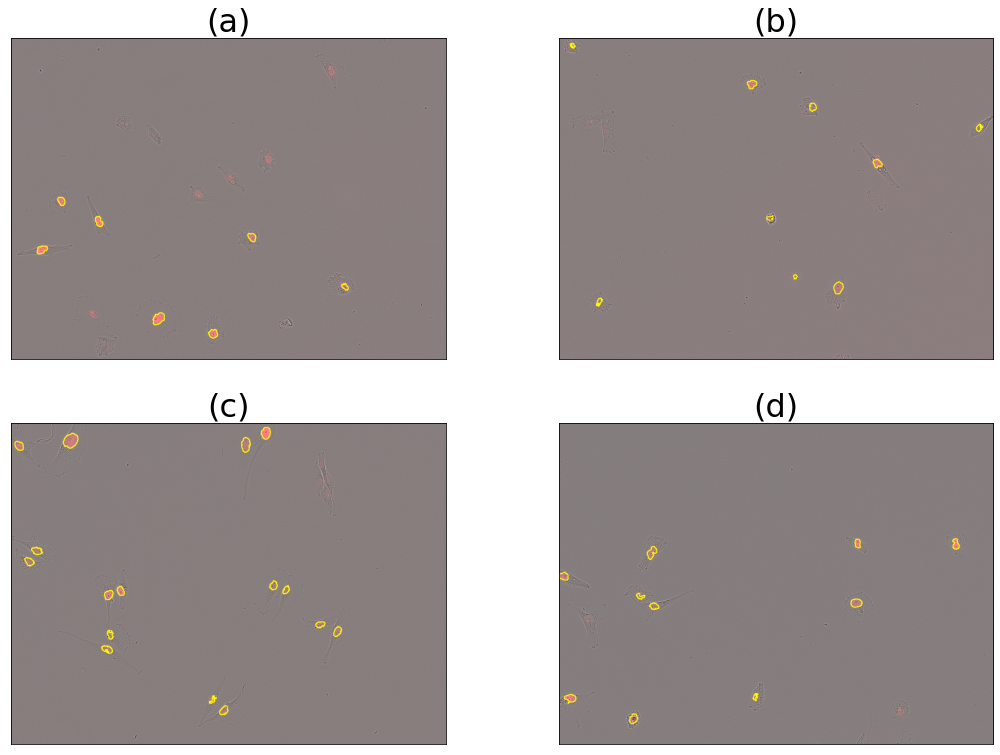

In [139]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images_draw[0])
axs[0][1].imshow(images_draw[1])
axs[1][0].imshow(images_draw[2])
axs[1][1].imshow(images_draw[3])

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Estatísticas

In [140]:
import pandas as pd

In [145]:
data = dict({
    'n_labels':[int(len(images_contours_areas[i])) for i in range(4)], 
    'max': [np.round(np.max(
        images_contours_areas[i]),2) for i in range(4)],
    'min': [np.round(np.min(
        images_contours_areas[i]),2) for i in range(4)],
    'mean': [np.round(np.mean(
        images_contours_areas[i]),2) for i in range(4)],
    'std': [np.round(np.std(
        images_contours_areas[i]),2) for i in range(4)],
    'median': [np.round(np.median(
        images_contours_areas[i]),2) for i in range(4)]
})
db = pd.DataFrame.from_dict(data, orient = 'index')
db.columns = [('Composite_0' + str(i)) for i in range(1,5)]

In [146]:
db

Composite_01  Composite_02  Composite_03  Composite_04
n_labels          7.00          9.00         16.00         10.00
max            1023.50        865.50       1608.00        757.00
min             277.00        106.50        177.50        147.50
mean            575.21        364.67        598.16        499.30
std             210.88        239.19        320.64        189.84
median          544.50        251.00        524.25        529.25

# 3

## Aplicando o filtro de sobel para obter o $\parallel\bigtriangledown I_f\parallel$

In [31]:
from skimage.filters import sobel

In [151]:
images_sobel = np.array(
    [np.abs(sobel(images_difference[i])) for i in range(4)])

## Plotando as imagens após aplicar o filtro de sobel

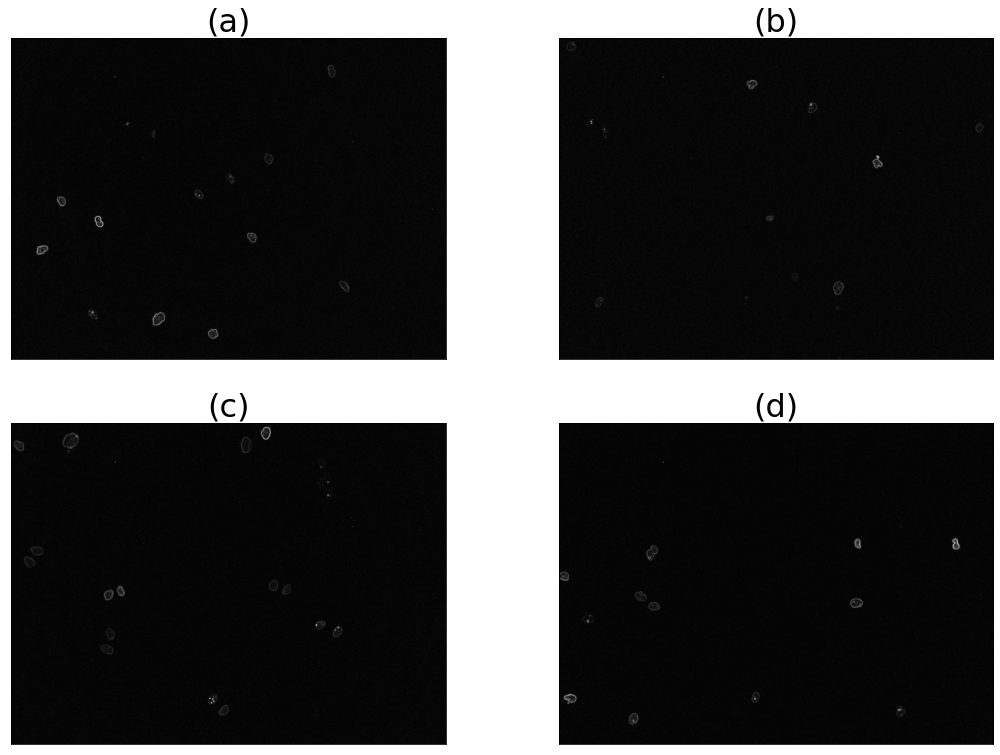

In [152]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images_sobel[0], cmap = 'gray')
axs[0][1].imshow(images_sobel[1], cmap = 'gray')
axs[1][0].imshow(images_sobel[2], cmap = 'gray')
axs[1][1].imshow(images_sobel[3], cmap = 'gray')

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Aplicando as operações morfológicas

In [34]:
from skimage.morphology import closing, erosion 

In [35]:
kernel = np.ones((3,3))

In [153]:
images_close = np.array(
    [closing(images_bi_otsu[i], kernel) for i in range(4)])

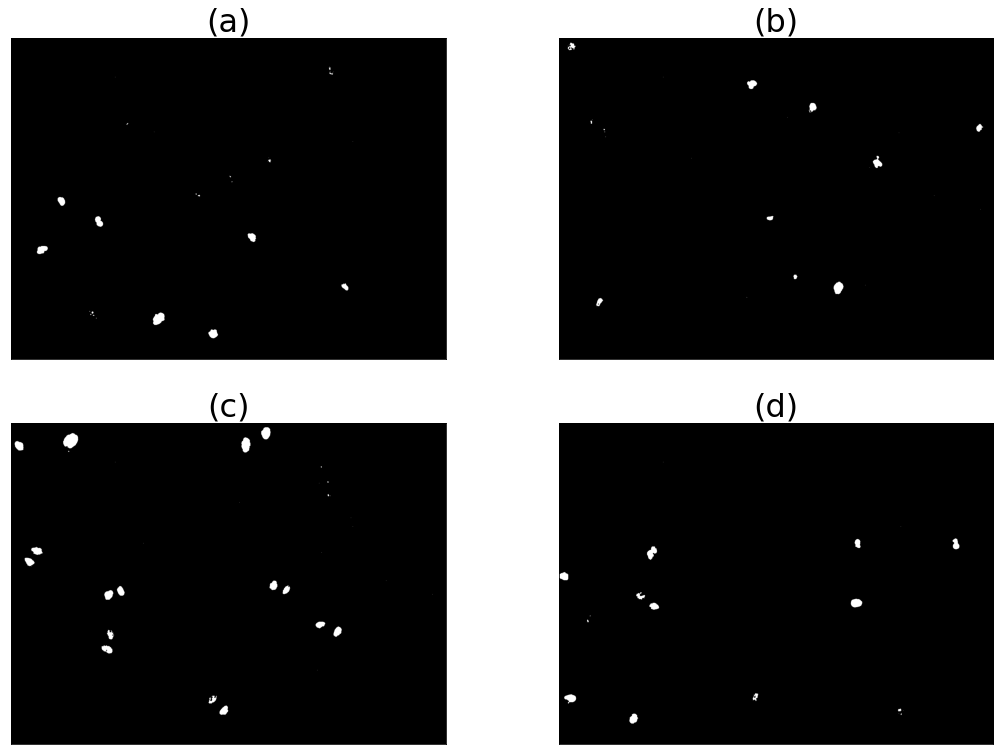

In [154]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images_close[0], cmap = 'gray')
axs[0][1].imshow(images_close[1], cmap = 'gray')
axs[1][0].imshow(images_close[2], cmap = 'gray')
axs[1][1].imshow(images_close[3], cmap = 'gray')

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

In [155]:
masks = np.array([erosion(images_close[i],kernel) for i in range(4)])

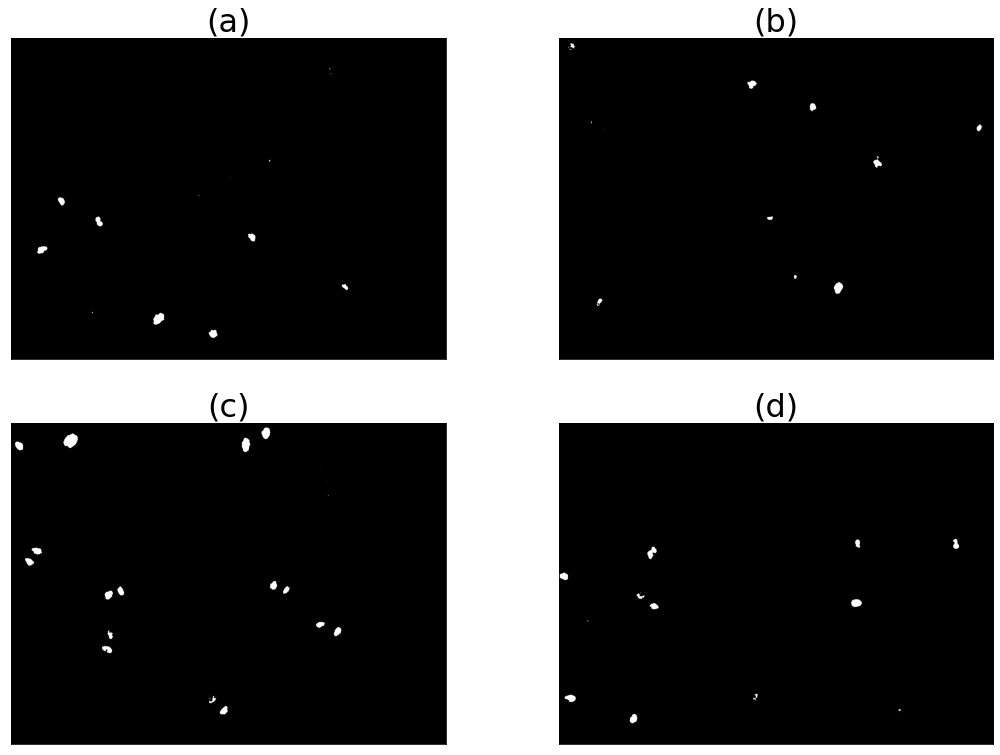

In [156]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(masks[0], cmap = 'gray')
axs[0][1].imshow(masks[1], cmap = 'gray')
axs[1][0].imshow(masks[2], cmap = 'gray')
axs[1][1].imshow(masks[3], cmap = 'gray')

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Aplicando a transformada de watershed

In [40]:
from skimage.segmentation import watershed
from scipy import ndimage as ndi

In [160]:
images_labels = []
for i in range(4):
    markers,_ = ndi.label(masks[i])
    labels = watershed(
        images_sobel[i],
        markers,
        mask=masks[i])
    images_labels.append(labels)
images_labels = np.array(images_labels)

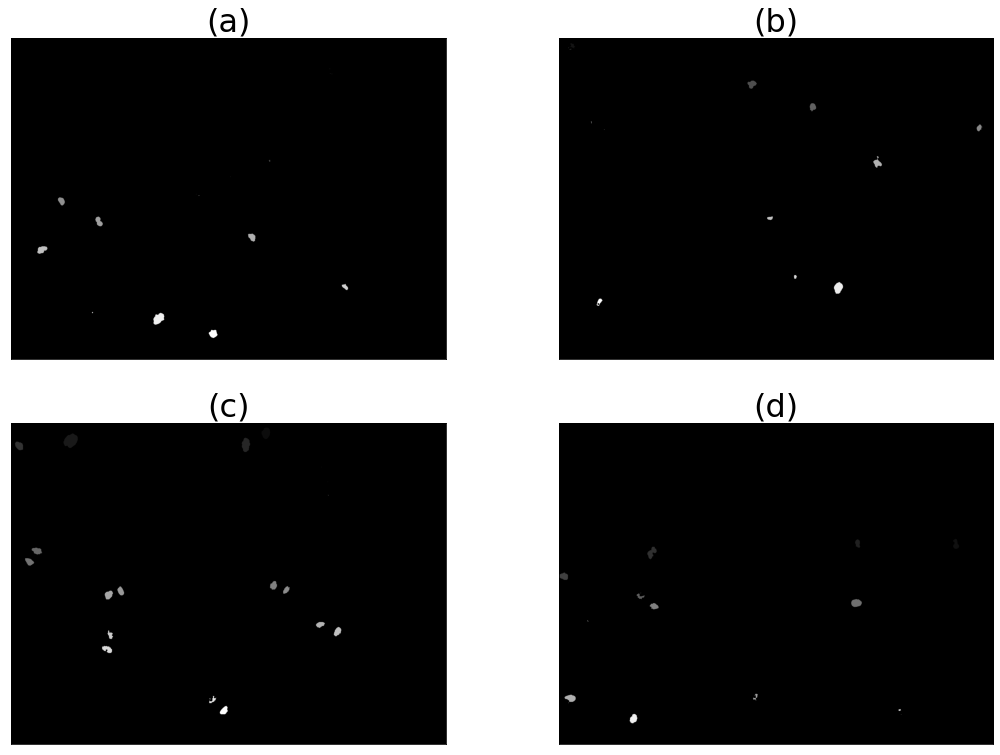

In [161]:
fig, axs = plt.subplots(2,2, figsize = (18,13))

axs[0][0].imshow(images_labels[0], cmap = 'gray')
axs[0][1].imshow(images_labels[1], cmap = 'gray')
axs[1][0].imshow(images_labels[2], cmap = 'gray')
axs[1][1].imshow(images_labels[3], cmap = 'gray')

titles = [['(a)', '(b)'], ['(c)', '(d)']]

for axss, titless in zip(axs,titles):
    for ax, title in zip(axss, titless):
        
        # Set title
        
        ax.set_title(title, fontsize = 32)
        
        # Remove axis
        
        ax.xaxis.set_major_locator(NullLocator())
        ax.yaxis.set_major_locator(NullLocator())

## Estatísticas

In [175]:
images_labels_count = [
    np.unique(images_labels[i], 
              return_counts = True)[1][1:] for i in range(4)]

In [176]:
images_labels_count_filter = [
    images_labels_count[i][
        images_labels_count[i] > minimum] for i in range(4)]

In [179]:
data = dict({
    'n_labels':[
        int(len(images_labels_count_filter[i])) for i in range(4)], 
    'max': [
        np.round(np.max(images_labels_count_filter[i]),2) for i in range(4)],
    'min': [
        np.round(np.min(images_labels_count_filter[i]),2) for i in range(4)],
    'mean': [
        np.round(np.mean(images_labels_count_filter[i]),2) for i in range(4)],
    'std': [
        np.round(np.std(images_labels_count_filter[i]),2) for i in range(4)],
    'median': [
        np.round(np.median(images_labels_count_filter[i]),2) for i in range(4)]
})
db = pd.DataFrame.from_dict(data, orient = 'index')
db.columns = [('Composite_0' + str(i)) for i in range(1,5)]

In [180]:
db

Composite_01  Composite_02  Composite_03  Composite_04
n_labels          7.00          8.00         16.00          9.00
max             928.00        777.00       1493.00        680.00
min             233.00        150.00        194.00        210.00
mean            506.43        364.12        545.81        476.89
std             197.22        202.05        296.28        142.92
median          470.00        319.00        475.00        515.00